### **Analisis exploratorio de datos**

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [78]:
df1 = pd.read_csv('str_1.csv', delimiter=";")
df2 = pd.read_csv('str_2.csv', delimiter=";")
df = pd.concat([df1, df2])

In [79]:
df.shape

(9537, 11)

In [80]:
df.head()

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [81]:
df.columns

Index(['ID', 'protocol', 'browser_type', 'login_attempts', 'duration',
       'packet_size', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'unusual_time_access', 'attack'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 0 to 7426
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9537 non-null   int64  
 1   protocol             9537 non-null   object 
 2   browser_type         9537 non-null   object 
 3   login_attempts       9409 non-null   float64
 4   duration             9537 non-null   float64
 5   packet_size          9537 non-null   int64  
 6   encryption_used      7571 non-null   object 
 7   ip_reputation_score  9537 non-null   float64
 8   failed_logins        9537 non-null   int64  
 9   unusual_time_access  9537 non-null   int64  
 10  attack               9537 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 894.1+ KB


In [83]:
df.describe(include='all')

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
count,9537.000000,9537,9537,9409.000000,9537.000000,9537.000000,7571,9537.000000,9537.000000,9537.000000,9537
unique,NaN,3,5,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,NaN,TCP,Chrome,NaN,NaN,NaN,AES,NaN,NaN,NaN,N
freq,NaN,6624,5137,NaN,NaN,NaN,4706,NaN,NaN,NaN,5273
mean,3124.823949,NaN,NaN,4.029971,792.745312,500.430639,NaN,0.331338,1.517773,0.149942,NaN
std,2209.075559,NaN,NaN,1.962595,786.560144,198.379364,NaN,0.177175,1.033988,0.357034,NaN
min,0.000000,NaN,NaN,1.000000,0.500000,64.000000,NaN,0.002497,0.000000,0.000000,NaN
25%,1192.000000,NaN,NaN,3.000000,231.953006,365.000000,NaN,0.191946,1.000000,0.000000,NaN
50%,2658.000000,NaN,NaN,4.000000,556.277457,499.000000,NaN,0.314778,1.000000,0.000000,NaN
75%,5042.000000,NaN,NaN,5.000000,1105.380602,635.000000,NaN,0.453388,2.000000,0.000000,NaN


In [84]:
df.head()

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [85]:
filtro_ataques = df[df['attack'] =='Y']
encriptacion_ataques = filtro_ataques["encryption_used"].fillna("ND")
filtro_n_ataques = df[df['attack'] =='N']
encriptacion_n_ataques = filtro_n_ataques["encryption_used"].fillna("ND")

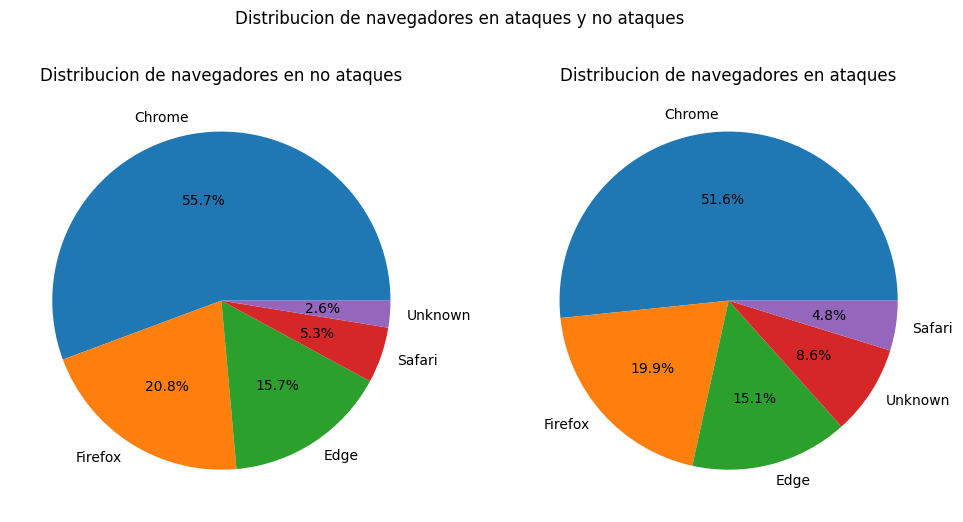

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribucion de navegadores en ataques y no ataques')

ax[0].set_title('Distribucion de navegadores en no ataques')
ax[0].pie(filtro_n_ataques['browser_type'].value_counts(), labels=filtro_n_ataques['browser_type'].value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Distribucion de navegadores en ataques')
ax[1].pie(filtro_ataques['browser_type'].value_counts(), labels=filtro_ataques['browser_type'].value_counts().index, autopct='%1.1f%%')
#print(filtro_ataques['browser_type'].value_counts())

plt.show()

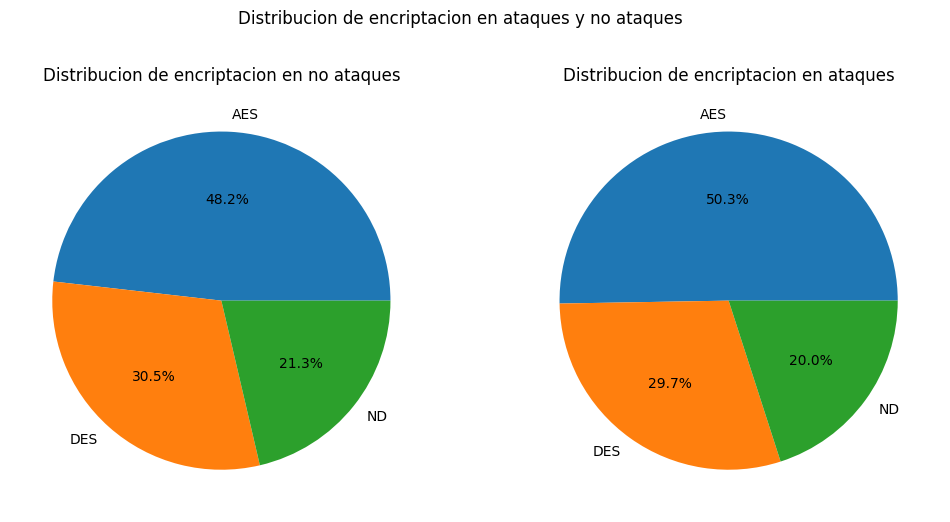

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribucion de encriptacion en ataques y no ataques')

ax[0].set_title('Distribucion de encriptacion en no ataques')
ax[0].pie(encriptacion_ataques.value_counts(), labels=encriptacion_ataques.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Distribucion de encriptacion en ataques')
ax[1].pie(encriptacion_n_ataques.value_counts(), labels=encriptacion_n_ataques.value_counts().index, autopct='%1.1f%%')
#print(filtro_ataques['browser_type'].value_counts())

plt.show()

In [88]:
filtro_ataques.describe(include="all")

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
count,4264.000000,4264,4264,4209.000000,4264.000000,4264.000000,3354,4264.000000,4264.000000,4264.000000,4264
unique,NaN,3,5,NaN,NaN,NaN,2,NaN,NaN,NaN,1
top,NaN,TCP,Chrome,NaN,NaN,NaN,AES,NaN,NaN,NaN,Y
freq,NaN,2963,2202,NaN,NaN,NaN,2055,NaN,NaN,NaN,4264
mean,3112.113743,NaN,NaN,4.633642,829.131980,498.931051,NaN,0.373015,1.935976,0.153377,NaN
std,2226.813841,NaN,NaN,2.268936,851.857703,199.308695,NaN,0.200488,1.184932,0.360393,NaN
min,0.000000,NaN,NaN,1.000000,0.500000,64.000000,NaN,0.002497,0.000000,0.000000,NaN
25%,1159.000000,NaN,NaN,3.000000,231.664142,361.000000,NaN,0.211048,1.000000,0.000000,NaN
50%,2630.500000,NaN,NaN,4.000000,559.358924,500.000000,NaN,0.347314,2.000000,0.000000,NaN
75%,5029.250000,NaN,NaN,6.000000,1166.808449,635.250000,NaN,0.525693,3.000000,0.000000,NaN


In [89]:
filtro_n_ataques.describe(include="all")

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
count,5273.000000,5273,5273,5200.000000,5273.000000,5273.000000,4217,5273.000000,5273.000000,5273.000000,5273
unique,NaN,3,5,NaN,NaN,NaN,2,NaN,NaN,NaN,1
top,NaN,TCP,Chrome,NaN,NaN,NaN,AES,NaN,NaN,NaN,N
freq,NaN,3661,2935,NaN,NaN,NaN,2651,NaN,NaN,NaN,5273
mean,3135.102029,NaN,NaN,3.541346,763.321311,501.643277,NaN,0.297636,1.179594,0.147165,NaN
std,2194.784387,NaN,NaN,1.506485,728.250219,197.635263,NaN,0.147434,0.736657,0.354304,NaN
min,1.000000,NaN,NaN,1.000000,0.500000,64.000000,NaN,0.007030,0.000000,0.000000,NaN
25%,1227.000000,NaN,NaN,2.000000,232.042818,368.000000,NaN,0.177466,1.000000,0.000000,NaN
50%,2674.000000,NaN,NaN,4.000000,554.069552,498.000000,NaN,0.293780,1.000000,0.000000,NaN
75%,5057.000000,NaN,NaN,5.000000,1066.236472,634.000000,NaN,0.412074,2.000000,0.000000,NaN


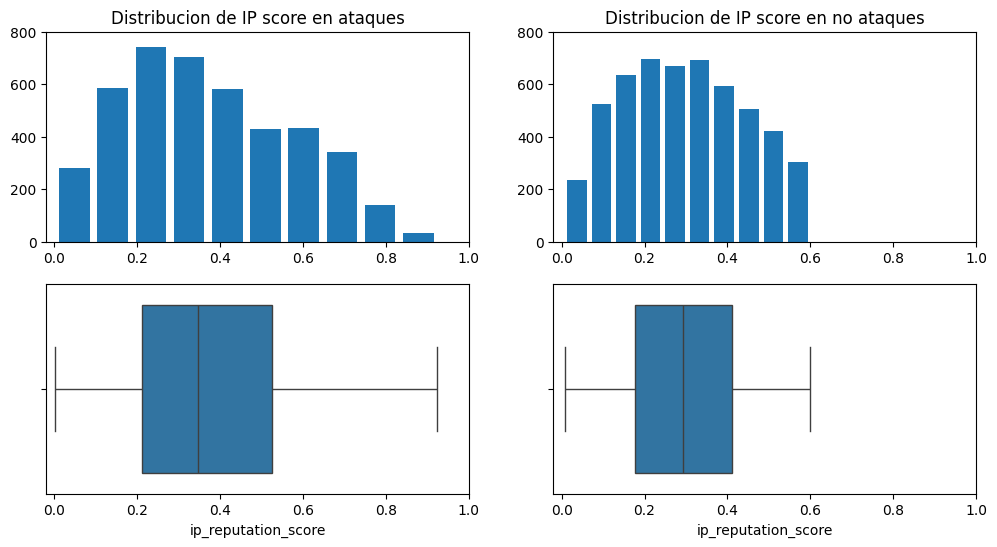

In [90]:
INF_X = -0.02
INF_Y = 0
SUP_X = 1
SUP_Y = 800
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('')

ax[0,0].set_ylim(INF_Y, SUP_Y)
ax[0,0].set_xlim(INF_X,  SUP_X)
ax[0,0].set_title('Distribucion de IP score en ataques')
ax[0,0].hist(filtro_ataques['ip_reputation_score'], bins=10, alpha=1, label='Ataques', rwidth=0.8)
ax[0,1].set_ylim(INF_Y, SUP_Y)
ax[0,1].set_xlim(INF_X,  SUP_X)
ax[0,1].set_title('Distribucion de IP score en no ataques')
ax[0,1].hist(filtro_n_ataques['ip_reputation_score'], bins=10, alpha=1, label='No ataques', rwidth=0.8)

sns.boxplot(x = filtro_ataques["ip_reputation_score"], ax=ax[1,0])
ax[1,0].set_xlim(INF_X,  SUP_X)
sns.boxplot(x = filtro_n_ataques["ip_reputation_score"], ax=ax[1,1])
ax[1,1].set_xlim(INF_X, SUP_X)

plt.show()

In [91]:
print("\t\tAtaque\t\t\t\tNo ataque")
print("Mediana \t", filtro_ataques["ip_reputation_score"].median(), "\t\t", filtro_n_ataques["ip_reputation_score"].median())
print("Media \t\t", filtro_ataques["ip_reputation_score"].mean(), "\t\t", filtro_n_ataques["ip_reputation_score"].mean())
print("Desviacion \t", filtro_ataques["ip_reputation_score"].std(), "\t\t", filtro_n_ataques["ip_reputation_score"].std())
print("Rango \t\t", filtro_ataques["ip_reputation_score"].max() - filtro_ataques["ip_reputation_score"].min(),
       "\t\t", filtro_n_ataques["ip_reputation_score"].max() - filtro_n_ataques["ip_reputation_score"].min())

		Ataque				No ataque
Mediana 	 0.3473143610523912 		 0.2937802757454712
Media 		 0.373014583069066 		 0.2976363214549331
Desviacion 	 0.2004877097690357 		 0.14743372815608502
Rango 		 0.9218023587889803 		 0.5926727313993998


### **Preprocesado de conjunto de datos**

In [92]:
df_original = df.copy()
df.drop('ID', axis=1, inplace=True)

In [93]:
df.isnull().sum()

protocol                  0
browser_type              0
login_attempts          128
duration                  0
packet_size               0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
unusual_time_access       0
attack                    0
dtype: int64

In [94]:
df.loc[pd.isnull(df.login_attempts)]

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
78,UDP,Chrome,NaN,195.410180,518,AES,0.447209,0,0,Y
97,TCP,Firefox,NaN,33.652804,552,AES,0.311972,0,0,N
126,TCP,Firefox,NaN,183.719758,301,AES,0.263931,2,0,N
132,TCP,Chrome,NaN,102.388924,287,NaN,0.063839,1,0,Y
155,TCP,Edge,NaN,72.910813,357,DES,0.199537,2,0,Y
...,...,...,...,...,...,...,...,...,...,...
6910,TCP,Edge,NaN,640.488738,537,DES,0.674310,3,0,Y
6911,UDP,Edge,NaN,1456.765115,821,AES,0.427167,1,1,N
6934,TCP,Firefox,NaN,22.106746,439,AES,0.809237,2,0,Y
7054,TCP,Unknown,NaN,898.844146,687,NaN,0.137867,0,0,N


In [95]:
df.loc[pd.isnull(df.login_attempts), 'login_attempts'] = df[pd.notnull(df.login_attempts)]['login_attempts'].median()

In [96]:
df.isnull().sum()

protocol                  0
browser_type              0
login_attempts            0
duration                  0
packet_size               0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
unusual_time_access       0
attack                    0
dtype: int64

In [97]:
df.shape

(9537, 10)

In [98]:
df_notnull_encrypt = df.loc[pd.notnull(df.encryption_used)]
conteo_aes = df_notnull_encrypt.loc[df_notnull_encrypt.encryption_used == 'AES'].count()
conteo_des = df_notnull_encrypt.loc[df_notnull_encrypt.encryption_used == 'DES'].count()
conteo_total = df_notnull_encrypt.shape[0]

porcentaje_aes = (conteo_aes['encryption_used']/conteo_total)
porcentaje_des = (conteo_des['encryption_used']/conteo_total)

print('Conteo de encriptaciones: AES: ', conteo_aes['encryption_used'], ' DES: ', conteo_des['encryption_used'], 'Total: ', conteo_total)
print('Porentaje de ecriptaciones: AES: ', porcentaje_aes*100, ' DES: ', porcentaje_des*100)

Conteo de encriptaciones: AES:  4706  DES:  2865 Total:  7571
Porentaje de ecriptaciones: AES:  62.1582353718135  DES:  37.8417646281865


In [99]:
indices = df.loc[pd.isnull(df.encryption_used)].index
conteo_nulos = df.loc[pd.isnull(df.encryption_used)].shape[0]

N_aes = round((conteo_aes['encryption_used']/conteo_total) * conteo_nulos)
N_des = round((conteo_des['encryption_used']/conteo_total) * conteo_nulos)

df = df.copy()
for index, row in df.iterrows():
    if pd.isnull(row['encryption_used']):
        random = np.random.rand()
        if random > porcentaje_aes:
            df.at[index, 'encryption_used'] = 'DES'
        else:
            df.at[index, 'encryption_used'] = 'AES'



In [100]:
df.isnull().sum()

protocol               0
browser_type           0
login_attempts         0
duration               0
packet_size            0
encryption_used        0
ip_reputation_score    0
failed_logins          0
unusual_time_access    0
attack                 0
dtype: int64

<Axes: >

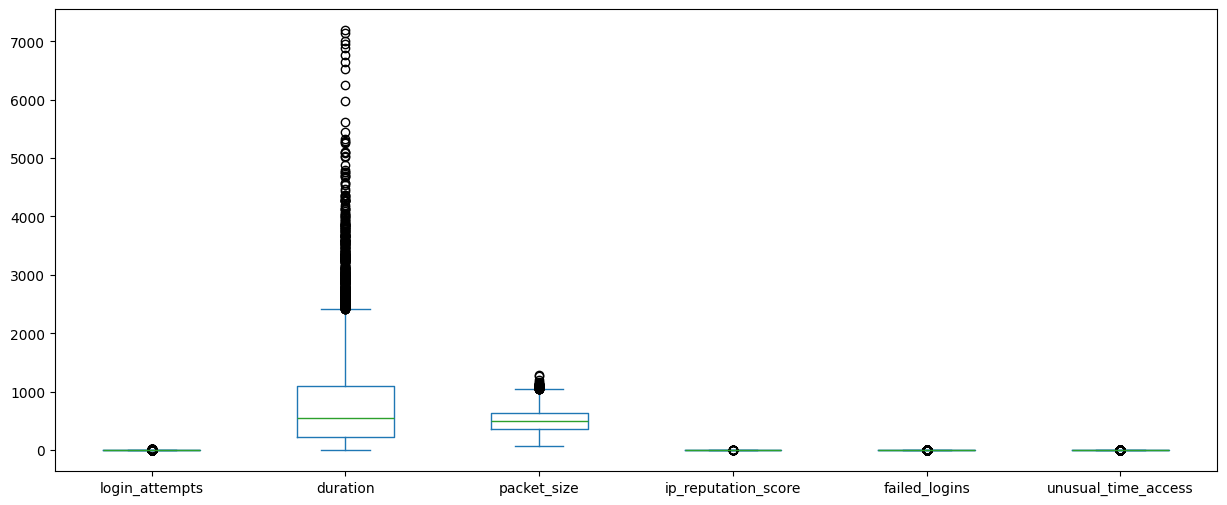

In [101]:
## Boxplot para visualizar valores atípicos
# Visualizamos la distribución de las distintas variables

fig, ax = plt.subplots(figsize=(15,6))
df.plot(kind='box', ax=ax)

<Axes: >

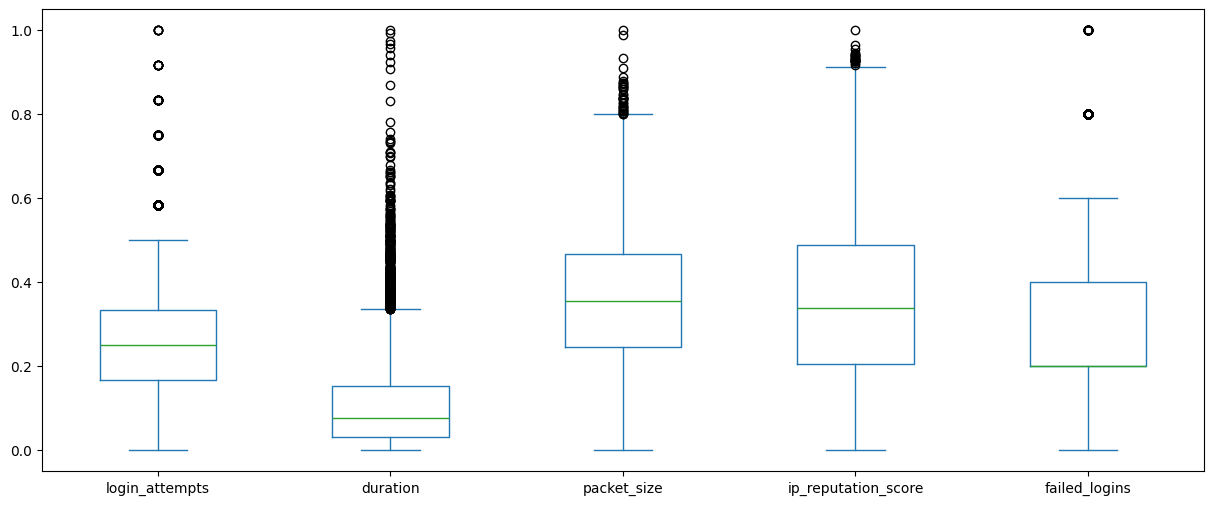

In [102]:
df_normal = df.copy()

# 'unusual_time_access' no es una variable numérica, por lo que no la normalizamos

# Aplicamos normalización a todas las columnas
columns = ['login_attempts', 'duration', 'packet_size', 'ip_reputation_score', 'failed_logins']
for column in columns:
    df_normal[column] = (df_normal[column] - df_normal[column].min()) / (df_normal[column].max() - df_normal[column].min())    
# Visualizamos la distribución de las distintas variables
fig, ax = plt.subplots(figsize=(15,6))
df_normal.loc[:,columns].plot(kind='box', ax=ax)

In [103]:
# determinar outliers en failed_logins
# Maximo = Q3 + 1.5 * (Q3-Q1)

maximo_failed_logins = df['failed_logins'].quantile(0.75) + 1.5 * (df['failed_logins'].quantile(0.75) - df['failed_logins'].quantile(0.25))
print("Valor maximo failed_logins: ", maximo_failed_logins)

# outliers dentro de failed logins
df_outliers = df.loc[df['failed_logins'] > maximo_failed_logins]
print("Cantidad de outliers dentro de failed_logins: ", df_outliers.shape[0])
# Cantidad de ataques dentro de los outliers
print("Cantidad de ataques dentro de los outliers: ", df_outliers.loc[df_outliers['attack'] == 'Y'].shape[0])

Valor maximo failed_logins:  3.5
Cantidad de outliers dentro de failed_logins:  323
Cantidad de ataques dentro de los outliers:  323


In [104]:
# determinar outliers en login_attempts
# Maximo = Q3 + 1.5 * (Q3-Q1)

maximo_login_attempts = df['login_attempts'].quantile(0.75) + 1.5 * (df['login_attempts'].quantile(0.75) - df['login_attempts'].quantile(0.25))
print("Valor maximo login_attempts: ", maximo_login_attempts)

# outliers dentro de login_attempts
df_outliers = df.loc[df['login_attempts'] > maximo_login_attempts]
print("Cantidad de outliers dentro de login_attempts: ", df_outliers.shape[0])
# Cantidad de ataques dentro de los outliers
print("Cantidad de ataques dentro de los outliers: ", df_outliers.loc[df_outliers['attack'] == 'Y'].shape[0])

Valor maximo login_attempts:  8.0
Cantidad de outliers dentro de login_attempts:  202
Cantidad de ataques dentro de los outliers:  202


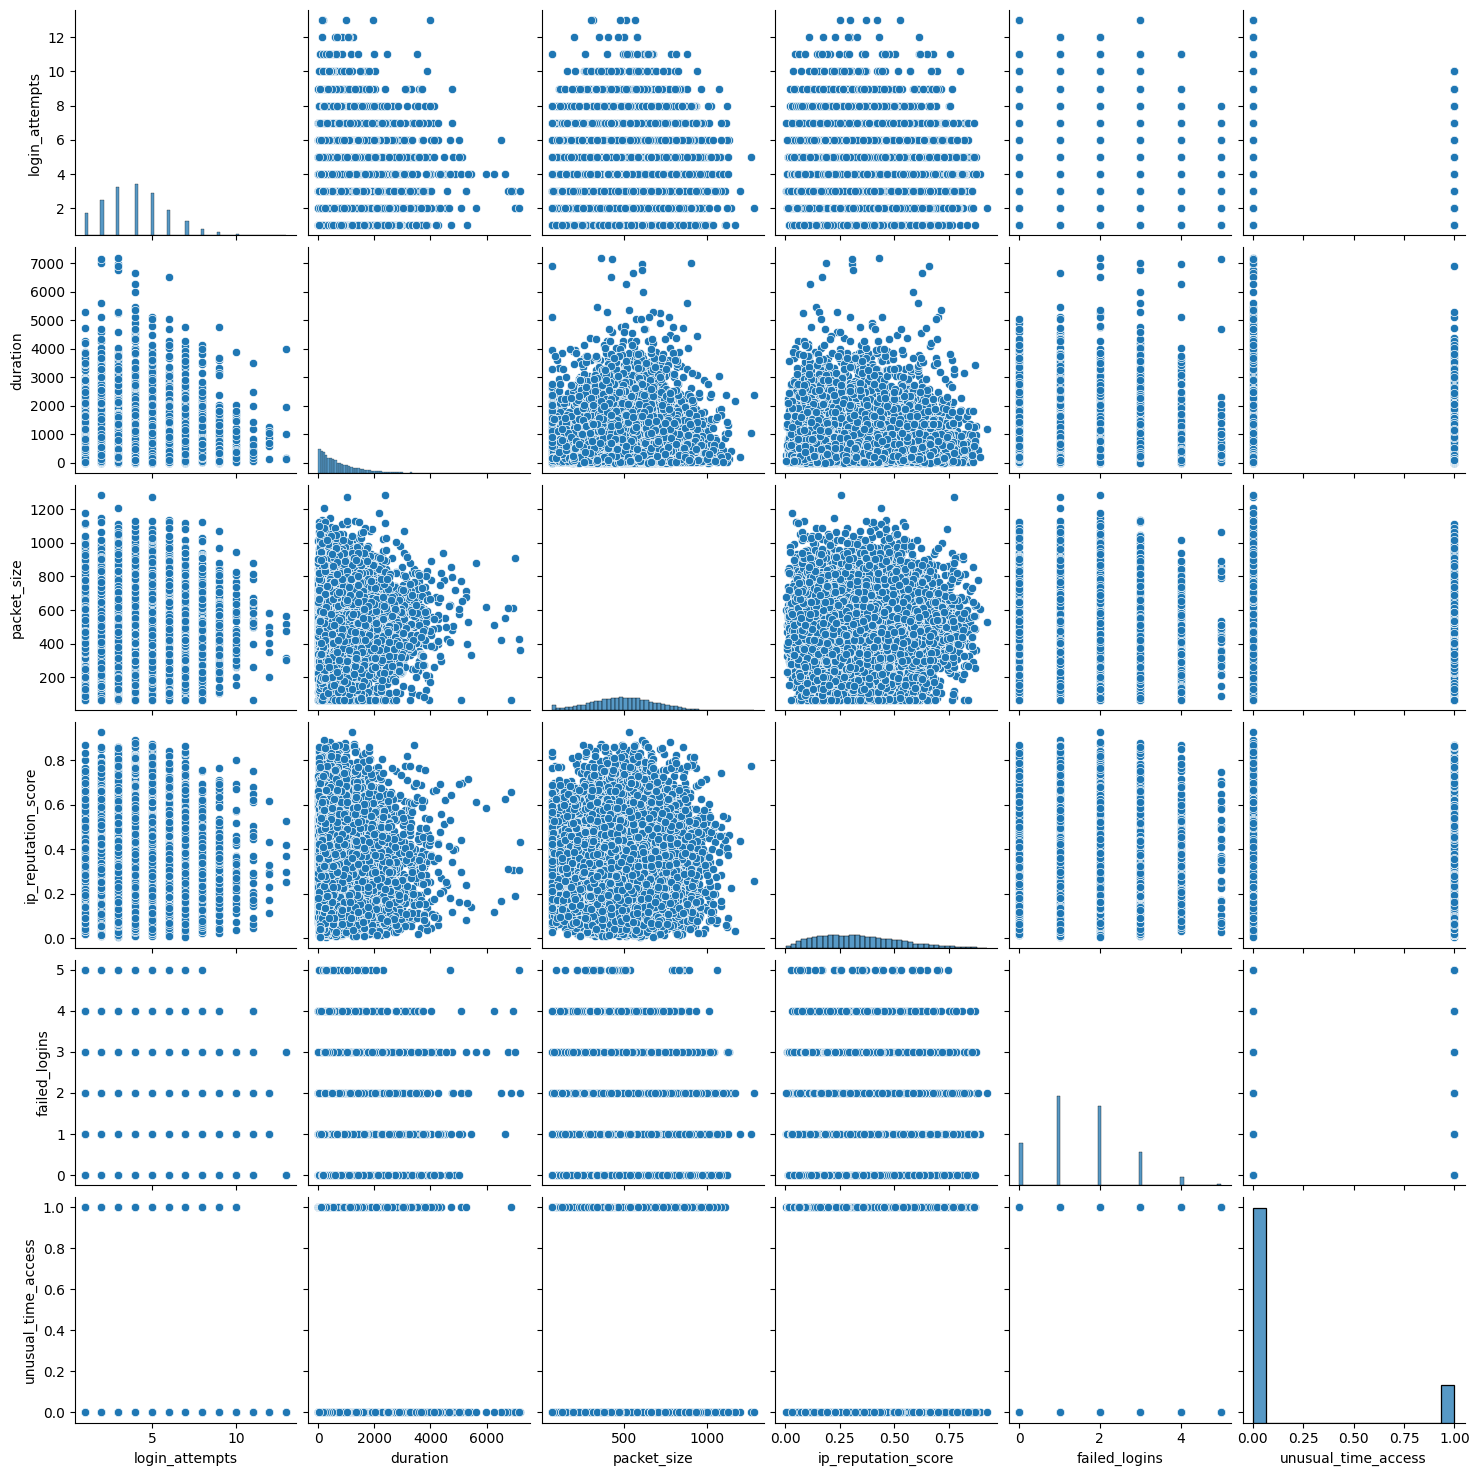

In [105]:
sns.pairplot(df)

Preprocesamiento de variables categoricas

In [106]:
df.head()

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,TCP,Firefox,5.0,532.540888,453,DES,0.054874,1,0,N


In [107]:
df['attack'] = df['attack'].replace({'Y': 1, 'N': 0})
# Y = 1 
# N = 0

C:\Users\JeroM\AppData\Local\Temp\ipykernel_6944\4172613148.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['attack'] = df['attack'].replace({'Y': 1, 'N': 0})


In [108]:
df = pd.get_dummies(df, columns=['browser_type'], dtype=int)
df = pd.get_dummies(df, columns=['encryption_used'], dtype=int)
df = pd.get_dummies(df, columns=['protocol'], dtype=int)

In [109]:
df.head()

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,unusual_time_access,attack,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown,encryption_used_AES,encryption_used_DES,protocol_ICMP,protocol_TCP,protocol_UDP
0,4.0,492.983263,599,0.606818,1,0,1,0,1,0,0,0,0,1,0,1,0
1,3.0,1557.996461,472,0.301569,0,0,0,0,0,1,0,0,0,1,0,1,0
2,3.0,75.044262,629,0.739164,2,0,1,1,0,0,0,0,0,1,0,1,0
3,4.0,601.248835,804,0.123267,0,0,1,0,0,0,0,1,0,1,0,0,1
4,5.0,532.540888,453,0.054874,1,0,0,0,0,1,0,0,0,1,0,1,0


In [110]:
corr = df.corr(numeric_only=True).abs()

In [111]:
column_mean = corr.mean(axis=1)

In [112]:
column_mean

login_attempts          0.081085
duration                0.069098
packet_size             0.069393
ip_reputation_score     0.080396
failed_logins           0.087457
unusual_time_access     0.063785
attack                  0.127129
browser_type_Chrome     0.154236
browser_type_Edge       0.114639
browser_type_Firefox    0.121549
browser_type_Safari     0.094900
browser_type_Unknown    0.104130
encryption_used_AES     0.124632
encryption_used_DES     0.124632
protocol_ICMP           0.094729
protocol_TCP            0.141351
protocol_UDP            0.128457
dtype: float64

In [124]:
corr_sliced = corr.iloc[0:7, 0:7]
corr_sliced

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,unusual_time_access,attack
login_attempts,1.000000,0.008463,0.001300,0.002887,0.014464,0.008696,0.274903
duration,0.008463,1.000000,0.021650,0.005077,0.019375,0.012930,0.041602
packet_size,0.001300,0.021650,1.000000,0.002320,0.011676,0.001255,0.006798
ip_reputation_score,0.002887,0.005077,0.002320,1.000000,0.015613,0.003146,0.211540
failed_logins,0.014464,0.019375,0.011676,0.015613,1.000000,0.006131,0.363726
unusual_time_access,0.008696,0.012930,0.001255,0.003146,0.006131,1.000000,0.008652
attack,0.274903,0.041602,0.006798,0.211540,0.363726,0.008652,1.000000


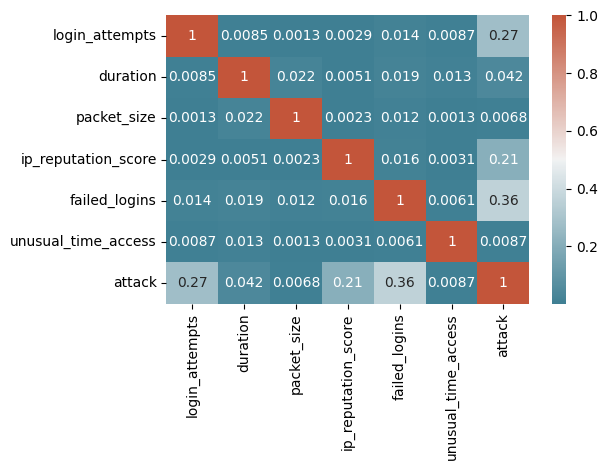

In [125]:
sns.heatmap(corr_sliced, xticklabels=corr_sliced.columns, yticklabels=corr_sliced.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()